In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#base = pd.read_csv('Data P80 SCAN 2016.txt',sep='\t')
base = pd.read_csv('p80y.txt',sep='\t')
base.head()

,Fecha,P80,Dens,Ton,PreCy,Pot,Pebl,Atroml,Abola,Caj,P80y
0,10/08/2016 07:00,139.612793,1337.884766,991.394775,104.568199,6595.551758,59.130924,91.370949,44.327915,55.3929863,137.5862762
1,10/08/2016 07:05,137.167252,1331.797485,727.979797,106.447815,6616.616455,70.737091,91.715790,45.055397,56.41624832,138.4038592
2,10/08/2016 07:06,138.622864,1326.228882,740.694092,109.559441,6612.327148,41.976059,90.796181,44.933514,56.61024094,135.9435723
3,10/08/2016 07:07,134.323654,1307.983276,675.754578,110.468041,6621.014160,28.808437,91.316246,44.811630,56.29335785,132.0293869
4,10/08/2016 07:08,127.983253,1304.986450,803.778687,102.234932,6618.791016,29.299236,90.882172,44.733429,55.97647858,130.0861462


In [2]:
data = base
base.isnull().sum()

Fecha     0
P80       0
Dens      0
Ton       0
PreCy     0
Pot       0
Pebl      0
Atroml    0
Abola     0
Caj       0
P80y      0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 11 columns):
Fecha     2341 non-null object
P80       2341 non-null float64
Dens      2341 non-null float64
Ton       2341 non-null float64
PreCy     2341 non-null float64
Pot       2341 non-null float64
Pebl      2341 non-null float64
Atroml    2341 non-null float64
Abola     2341 non-null float64
Caj       2341 non-null object
P80y      2341 non-null object
dtypes: float64(8), object(3)
memory usage: 201.3+ KB


In [4]:
## Por alguna razon hay una fila con valor Bad

data = data[data.Caj!='Bad']
data.Caj = data.Caj.astype('float')


/home/gianfranco/.local/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [5]:
## Conversión de object a float

data.P80y = pd.to_numeric(data.P80y,errors='coerce')

/home/gianfranco/.local/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## Separacion en Train/Test

In [6]:
vars_to_model = list(base.columns)
target = 'P80'

for col in [target,'Fecha','P80y']:
    if col in vars_to_model:
        vars_to_model.remove(col)

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3, random_state=99)

X_train = data_train[vars_to_model]
y_train = data_train[target]
X_test = data_test[vars_to_model]
y_test = data_test[target]

# Modelos de Regresion

In [7]:
# Creamos columnas para la tabla de resultados
models=[]
mse=[]
r2=[]

In [8]:
%%time 
models.append('Regresion Lineal')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lregr = linear_model.LinearRegression()

# Train the model using the training sets
lregr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = lregr.predict(X_test)

# The coefficients
print (vars_to_model)
print('Coefficients: \n', lregr.coef_)
# The mean squared error
mse.append(mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
r2.append(r2_score(y_test, y_pred))

['Dens', 'Ton', 'PreCy', 'Pot', 'Pebl', 'Atroml', 'Abola', 'Caj']
Coefficients: 
 [  1.67289941e-01   4.66585637e-04   1.78566536e-01  -3.83497394e-03
   7.27531629e-02  -6.75822219e-02  -6.85799556e-01  -6.95987454e-02]
CPU times: user 46.2 ms, sys: 40.6 ms, total: 86.8 ms
Wall time: 357 ms


In [9]:
%%time 
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# The coefficients
print (vars_to_model)
print('Coefficients: \n', clf.coef_)
models.append('Regresion Ridge')
# The mean squared error
mse.append(mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
r2.append(r2_score(y_test, y_pred))


['Dens', 'Ton', 'PreCy', 'Pot', 'Pebl', 'Atroml', 'Abola', 'Caj']
Coefficients: 
 [  1.68407037e-01   4.35933516e-04   1.94502527e-01  -2.44307449e-03
   7.41100332e-02  -6.81319946e-02  -4.88281569e-01  -5.94945036e-02]
CPU times: user 15.1 ms, sys: 33.8 ms, total: 48.9 ms
Wall time: 38.7 ms


In [10]:
%%time 
name ='Regresion x^'
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
for k in range(2,5):
    poly_reg = PolynomialFeatures(degree = k)
    X_poly = poly_reg.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    ylin = lin_reg.predict(poly_reg.fit_transform(X_test))
    # Fill table
    models.append(name+str(k))
    mse.append(mean_squared_error(y_test, ylin))
    r2.append(r2_score(y_true=y_test, y_pred=ylin))


CPU times: user 378 ms, sys: 667 ms, total: 1.05 s
Wall time: 217 ms


In [11]:
%%time 
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(n_jobs = 4)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

models.append('LGBM')
# The mean squared error
mse.append(mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
r2.append(r2_score(y_test, y_pred))

CPU times: user 344 ms, sys: 219 ms, total: 562 ms
Wall time: 187 ms


In [12]:
# SCAN
models.append('SCAN')
# The mean squared error
y_scan = data_test['P80y']
mse.append(mean_squared_error(y_test, y_scan))
# Explained variance score: 1 is perfect prediction
r2.append(r2_score(y_test, y_scan))

In [13]:
results = pd.DataFrame(models,columns = ['Modelo'])
results['R2'] = r2
results['MSE'] = mse
results

,Modelo,R2,MSE
0,Regresion Lineal,0.846801,11.392244
1,Regresion Ridge,0.844858,11.536721
2,Regresion x^2,0.711325,21.466512
3,Regresion x^3,0.900482,7.400383
4,Regresion x^4,0.493453,37.667963
5,LGBM,0.916549,6.205627
6,SCAN,0.740491,19.297695


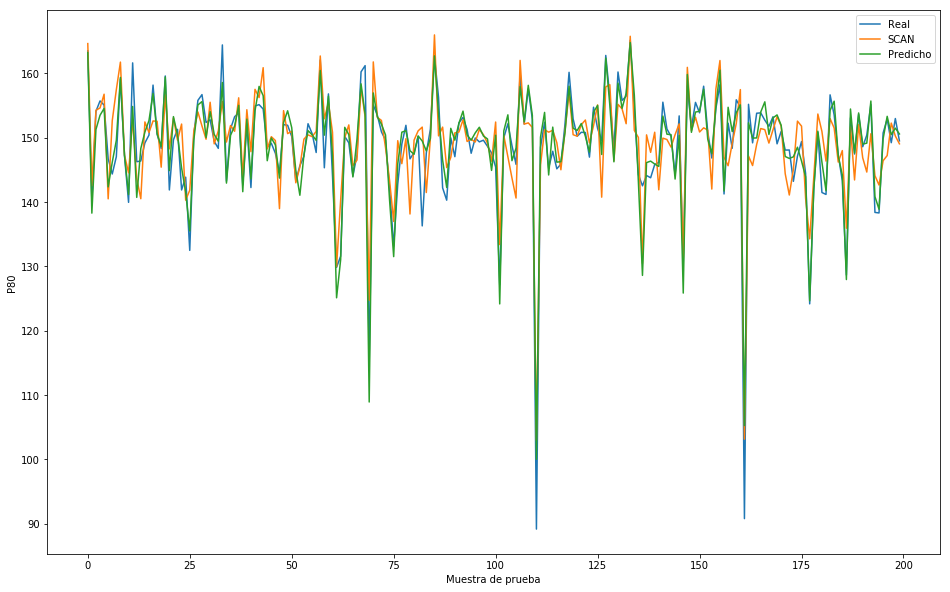

In [22]:
plt.rcParams['figure.figsize'] = (16, 10)

n = 200 # cantidad de muestras
N = range(n) # range(len(y_test))

plt.plot(N,y_test[:n],label='Real')
plt.plot(N,y_scan[:n],label='SCAN')
plt.plot(N,y_pred[:n],label='Predicho')
plt.legend(loc=1)

plt.xlabel('Muestra de prueba')
plt.ylabel('P80')

plt.show()